In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file to explore its content and structure
data = pd.read_csv('All Distributed Unfunded Aid by Admit Status 20240314-104043 (1).csv')

# Display the first few rows of the dataframe and the column names to understand the dataset
data.head(), data.columns


(   Unique ID Application Submitted Date                             College  \
 0  999789535                   10/10/23           Albers School of Business   
 1  982505163                   19/12/23           Albers School of Business   
 2  999851695                   31/01/21                College of Education   
 3  978092429                   15/12/23           Albers School of Business   
 4  976965474                   28/03/22  College of Science and Engineering   
 
                                  Application Program Application Start Term  \
 0  Business Administration (Professional) - MBA -...            Winter 2024   
 1           Sport and Entertainment Management - MBA            Winter 2024   
 2  Counseling, Clinical Mental Health Counseling ...              Fall 2021   
 3  Business Administration (Professional) - MBA -...            Winter 2024   
 4          Computer Science Fundamentals Certificate            Winter 2024   
 
                     Decision Reason

In [49]:


# Extract the numeric value from the scholarship tier and convert it to float
data['Scholarship Amount'] = data['Application Scholarship Tier'].str.extract(r'\$(\d+)').astype(float)

# Define the criteria for decision reasons indicating a decline or no-show
not_influenced_decisions = ['Admit Declined - Post Enroll(CF)', 'No Show - Post Enroll(CF)', 'Admit Declined']

# Filter for 'Influenced with Aid'
influenced_with_aid = data[
    (data['Scholarship Amount'] > 0) &
    (data['Registered in Colleague'] == 1) &
    (~data['Decision Reason'].isin(not_influenced_decisions))
]

# Filter for 'Not Influenced with Aid'
not_influenced_with_aid = data[
    (data['Scholarship Amount'] > 0) 
    & (data['Decision Reason'].isin(not_influenced_decisions))
]

# Print the counts
print('Influenced with Aid:', influenced_with_aid.shape[0])
print('Not Influenced with Aid:', not_influenced_with_aid.shape[0])
data['Scholarship Amount']

Influenced with Aid: 1099
Not Influenced with Aid: 1599


0          0.0
1          0.0
2       2400.0
3          0.0
4          0.0
         ...  
9440       0.0
9441       0.0
9442       0.0
9443       0.0
9444    6000.0
Name: Scholarship Amount, Length: 9445, dtype: float64

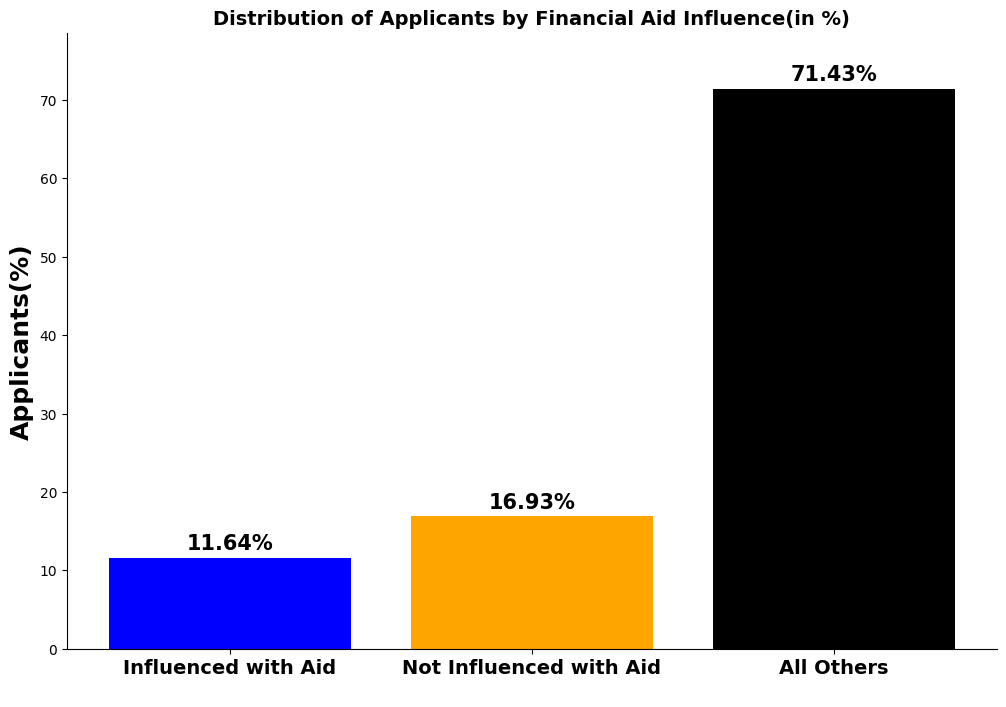

In [50]:
# Calculate the count for 'All Others'
total_count = data.shape[0]
all_others_count = total_count - influenced_with_aid.shape[0] - not_influenced_with_aid.shape[0]

# Data for plotting
categories = ['Influenced with Aid', 'Not Influenced with Aid', 'All Others']
counts = [influenced_with_aid.shape[0], not_influenced_with_aid.shape[0], all_others_count]
percentages = [x / total_count * 100 for x in counts]

# Create a bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(categories, percentages, color=['blue', 'orange', 'black'])
plt.title('Distribution of Applicants by Financial Aid Influence(in %)', fontsize=14, fontweight='bold')
plt.xlabel(' ')
plt.ylabel('Applicants(%)', fontsize=18, fontweight='bold')
plt.ylim(0, max(percentages) * 1.1)  # Adding some space above the highest bar for better visualization

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}%", ha='center', fontweight='bold', fontsize=15)

plt.grid(False)
sns.despine(left=False, bottom=False)  # To remove the borders
plt.xticks(fontweight='bold', fontsize=14)
plt.show()

/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_11289/487039221.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  acceptance_rates['Accepted'].fillna(0, inplace=True)
/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_11289/487039221.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=acceptance_rates_sorted.head(10), x='Acceptance Rate', y='Applicatio

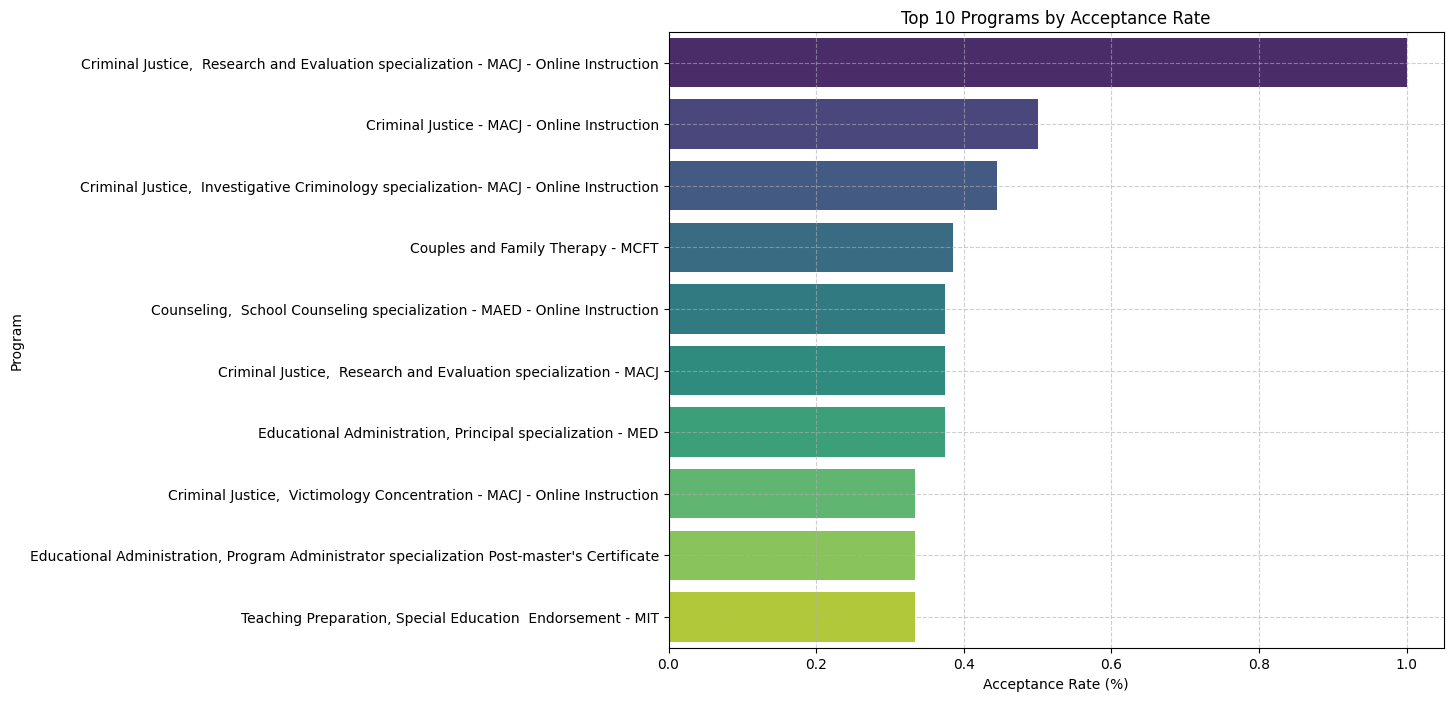

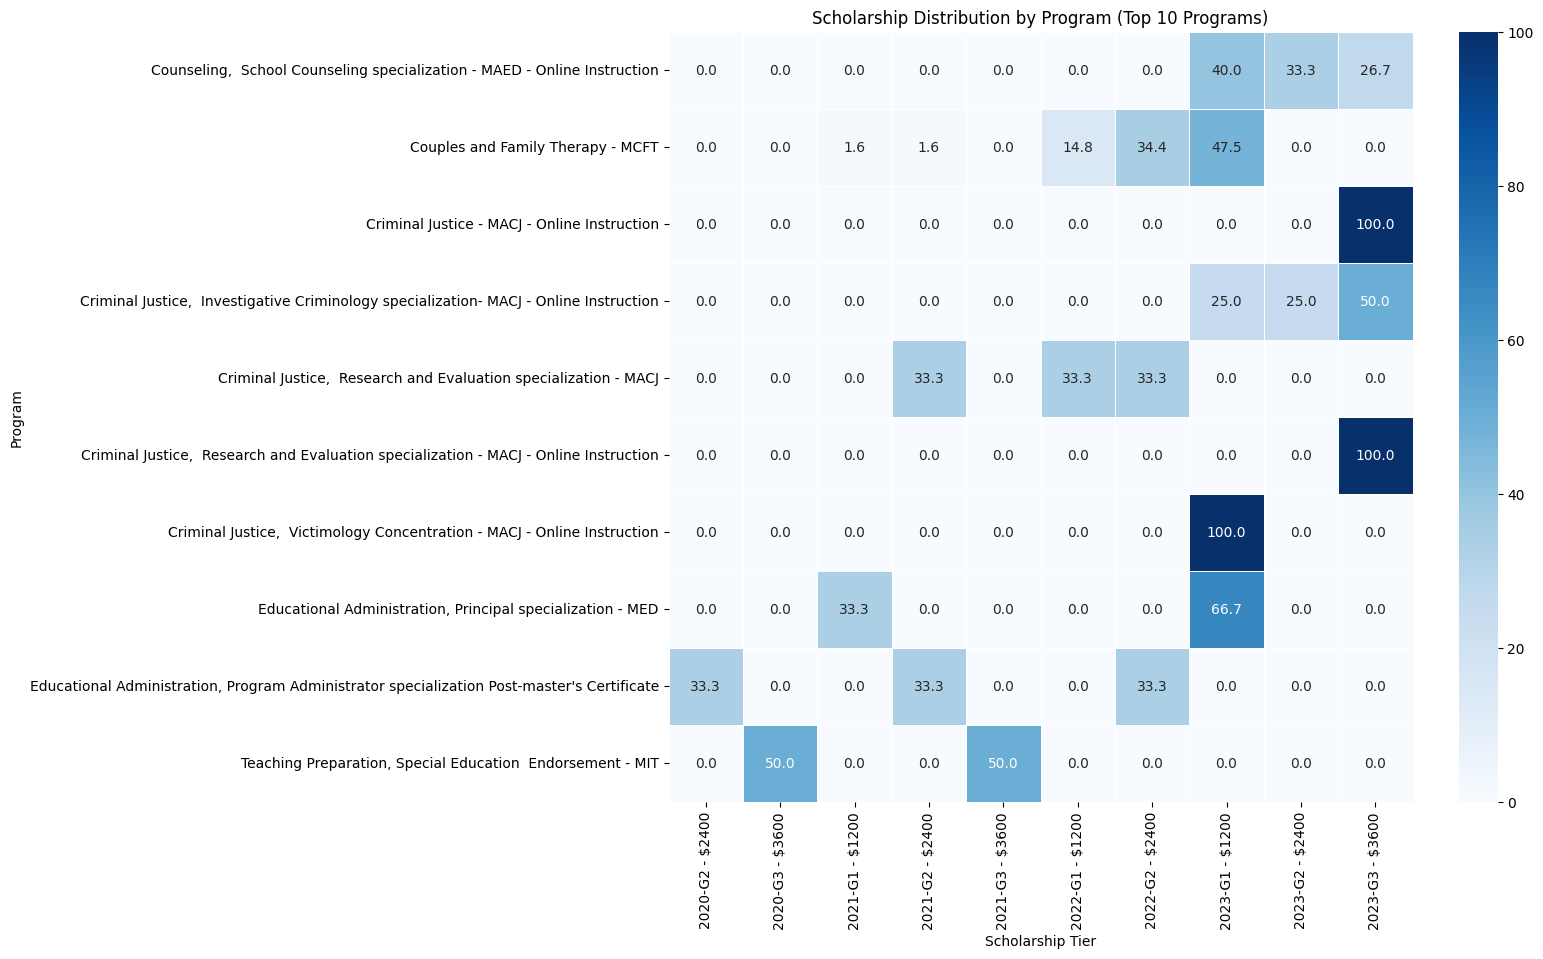

In [51]:


# Calculate acceptance rates by program
program_acceptance = influenced_with_aid.groupby('Application Program').size().reset_index(name='Accepted')
total_applicants = data.groupby('Application Program').size().reset_index(name='Total Applicants')
acceptance_rates = pd.merge(total_applicants, program_acceptance, on='Application Program', how='left')
acceptance_rates['Accepted'].fillna(0, inplace=True)
acceptance_rates['Acceptance Rate'] = acceptance_rates['Accepted'] / acceptance_rates['Total Applicants']
acceptance_rates_sorted = acceptance_rates.sort_values(by='Acceptance Rate', ascending=False)

# Visualize acceptance rates
plt.figure(figsize=(10, 8))
sns.barplot(data=acceptance_rates_sorted.head(10), x='Acceptance Rate', y='Application Program', palette='viridis')
plt.title('Top 10 Programs by Acceptance Rate')
plt.xlabel('Acceptance Rate (%)')
plt.ylabel('Program')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Analyze scholarship distribution among top programs
top_programs = acceptance_rates_sorted.head(10)['Application Program'].tolist()
top_programs_aid = influenced_with_aid[influenced_with_aid['Application Program'].isin(top_programs)]
scholarship_distribution = top_programs_aid.groupby(['Application Program', 'Application Scholarship Tier']).size().unstack().fillna(0)
scholarship_distribution_percent = scholarship_distribution.div(scholarship_distribution.sum(axis=1), axis=0) * 100

# Visualize scholarship distribution
plt.figure(figsize=(12, 10))
sns.heatmap(scholarship_distribution_percent, annot=True, cmap='Blues', fmt='.1f', linewidths=.5)
plt.title('Scholarship Distribution by Program (Top 10 Programs)')
plt.xlabel('Scholarship Tier')
plt.ylabel('Program')
plt.show()


In [52]:


# Adjust scholarship tier notation if necessary and extract amounts
data['Scholarship Amount'] = data['Application Scholarship Tier'].replace('2022-G1 - $0', '2022-G0 - $0')
data['Scholarship Amount'] = data['Application Scholarship Tier'].str.extract(r'\$(\d+)').astype(float)

# Convert dates to datetime objects
data['Admit Date'] = pd.to_datetime(data['Admit Date'])
data['Confirm/Deny Date'] = pd.to_datetime(data['Confirm/Deny Date'])

# Calculate the days between admission and acceptance
data['Days to Accept'] = (data['Confirm/Deny Date'] - data['Admit Date']).dt.days

# Filter the data based on your criteria
filtered_data = data[
    (data['Registered in Colleague'] == 1) &
    (~data['Decision Reason'].isin(['Admit Declined - Post Enroll(CF)', 'No Show - Post Enroll(CF)', 'Admit Declined']))
]

# Group by program and calculate the average days to acceptance
average_days_by_program = filtered_data.groupby('Application Program')['Days to Accept'].mean()

# Check for correlation between scholarship amount and days to accept
correlation = filtered_data['Scholarship Amount'].corr(filtered_data['Days to Accept'])

print(average_days_by_program)
print('Correlation:', correlation)


Application Program
Accounting (Professional) - MPAC                                                               10.560976
Accounting (Professional) - MPAC Advanced                                                       5.360000
Accounting Certificate                                                                          2.428571
Accounting and Analytics - MS                                                                   5.500000
Acute Care Nurse Practitioner with Adult-Geriatric specialization Post-Master's Certificate     4.500000
                                                                                                 ...    
Teaching English to Speakers of Other Languages - MAED                                          2.000000
Teaching Preparation, Special Education  Endorsement - MIT                                      1.200000
Theology and Ministry - MA                                                                      1.200000
Transformational Leadership - MATL 

In [53]:
data['Scholarship Amount']

0          0.0
1          0.0
2       2400.0
3          0.0
4          0.0
         ...  
9440       0.0
9441       0.0
9442       0.0
9443       0.0
9444    6000.0
Name: Scholarship Amount, Length: 9445, dtype: float64

In [54]:

from scipy.stats import chi2_contingency


# Define "Unfunded Aid Offered"
data['Unfunded Aid Offered'] = data['Scholarship Amount'] > 0

# Define "Acceptance"
data['Accepted Offer'] = (data['Registered in Colleague'] == 1) & \
                         (~data['Decision Reason'].isin(['Admit Declined - Post Enroll(CF)', 
                                                        'No Show - Post Enroll(CF)', 
                                                        'Admit Declined']))

# Prepare the contingency table
contingency_table = pd.crosstab(data['Unfunded Aid Offered'], data['Accepted Offer'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square Statistic:", chi2)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant association between receiving unfunded aid and accepting the offer.")
else:
    print("There is no statistically significant association between receiving unfunded aid and accepting the offer.")


Chi-square Statistic: 87.36700200740279
P-value: 9.014191791107386e-21
There is a statistically significant association between receiving unfunded aid and accepting the offer.


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file to explore its content and structure
data = pd.read_csv('All Distributed Unfunded Aid by Admit Status 20240314-104043 (1).csv')

# Display the first few rows of the dataframe and the column names to understand the dataset
data.head(), data.columns


(   Unique ID Application Submitted Date                             College  \
 0  999789535                   10/10/23           Albers School of Business   
 1  982505163                   19/12/23           Albers School of Business   
 2  999851695                   31/01/21                College of Education   
 3  978092429                   15/12/23           Albers School of Business   
 4  976965474                   28/03/22  College of Science and Engineering   
 
                                  Application Program Application Start Term  \
 0  Business Administration (Professional) - MBA -...            Winter 2024   
 1           Sport and Entertainment Management - MBA            Winter 2024   
 2  Counseling, Clinical Mental Health Counseling ...              Fall 2021   
 3  Business Administration (Professional) - MBA -...            Winter 2024   
 4          Computer Science Fundamentals Certificate            Winter 2024   
 
                     Decision Reason

In [63]:
import pandas as pd
from scipy.stats import chi2_contingency


# Extract the year from 'Application Scholarship Tier'
# Assumes the year is always the first four characters before a dash
data['Year'] = data['Application Scholarship Tier'].str.extract(r'(\d{4})').astype(int)

# Filter data for entries from 2020 onwards
data = data[data['Year'] >= 2020]

# Convert scholarship amounts and define unfunded aid offered
data['Scholarship Amount'] = data['Application Scholarship Tier'].str.extract(r'\$(\d+)').astype(float)
data['Unfunded Aid Offered'] = data['Scholarship Amount'] > 0

# Define "Acceptance"
data['Accepted Offer'] = (data['Registered in Colleague'] == 1) & \
                         (data['Decision Reason'].isin(['Admit Conditional', 'Admit Conditional & Bridge', 'Admit Conditional & Probationary',
    'Admit Probation', 'Admit Regular', 'Deposit - Not Required', 'Deposit Paid',
    'Deposit Waived/Not Required']))

# Prepare the contingency table for the chi-square test
contingency_table = pd.crosstab(data['Unfunded Aid Offered'], data['Accepted Offer'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square Statistic:", chi2)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant association between receiving unfunded aid and accepting the offer.")
else:
    print("There is no statistically significant association between receiving unfunded aid and accepting the offer.")
contingency_table

Chi-square Statistic: 46.39041440014189
P-value: 9.688833861315138e-12
There is a statistically significant association between receiving unfunded aid and accepting the offer.


Accepted Offer,False,True
Unfunded Aid Offered,,
False,2885,2311
True,1892,1099


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load the data
file_path = 'All Distributed Unfunded Aid by Admit Status 20240314-104043 (1).csv'  # Make sure to update this path to where your actual file is stored
data = pd.read_csv(file_path, parse_dates=['Admit Date', 'Confirm/Deny Date'], date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%Y'))

# Calculating time to decide
data['Time to Decide'] = (data['Confirm/Deny Date'] - data['Admit Date']).dt.days

# Extract scholarship amount and convert to float
data['Scholarship Amount'] = data['Application Scholarship Tier'].str.extract(r'\$(\d+,?\d*.?\d*)')[0]
data['Scholarship Amount'] = data['Scholarship Amount'].str.replace(',', '').astype(float)

# Define unfunded aid offered
data['Unfunded Aid Offered'] = data['Scholarship Amount'] > 0

# Define influenced with aid
data['Influenced with Aid'] = (data['Registered in Colleague'] == 1) & \
                         (data['Decision Reason'].isin(['Admit Conditional', 'Admit Conditional & Bridge', 'Admit Conditional & Probationary',
    'Admit Probation', 'Admit Regular', 'Deposit - Not Required', 'Deposit Paid',
    'Deposit Waived/Not Required']))

# Selecting features
features = ['College', 'Application Program', 'Scholarship Amount', 'Time to Decide', 'Age', 'Person Sex', 'Person Race', 'Person Citizenship Status']
X = data[features]
y = data['Influenced with Aid']

# Handling categorical variables
categorical_features = ['College', 'Application Program', 'Person Sex', 'Person Race', 'Person Citizenship Status']
numeric_features = ['Scholarship Amount', 'Time to Decide', 'Age']

# Creating a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Creating a pipeline that includes preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fitting the model
pipeline.fit(X_train, y_train)

# Predicting and evaluating the model
predictions = pipeline.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_11289/1543142334.py:12: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(file_path, parse_dates=['Admit Date', 'Confirm/Deny Date'], date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%Y'))


ValueError: Found unknown categories ['Special Education - EDS', 'Transformational Leadership degree/Juris Doctor - MATL/JD'] in column 1 during transform